In [1]:
import sys
sys.path.append('..')

from matplotlib import pyplot
import seaborn as sbs
import numpy as np
from wordcloud import WordCloud

from src.create_dataset import load_categories
from src import PATH_RAW_DATA

%matplotlib inline

Plotting the distribution of categories:

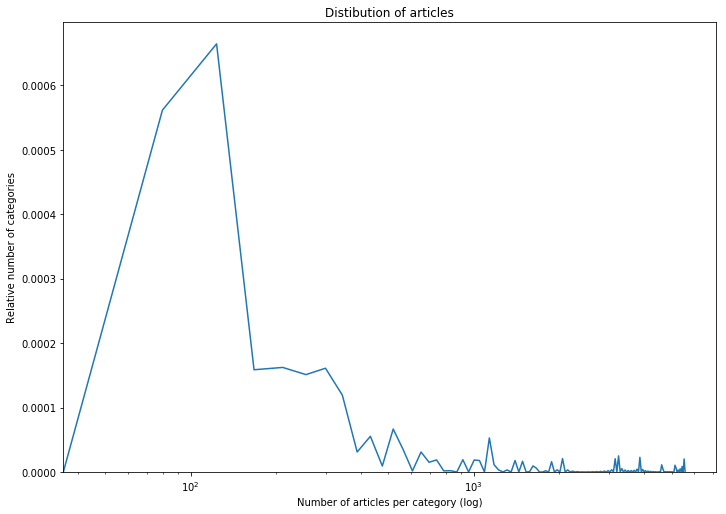

In [2]:
categories = load_categories(PATH_RAW_DATA / "articles.pickle", 5)
occurences = [(key, len(value)) for key, value in categories.items()]
occurences.sort(key=lambda x: x[1], reverse=True)

num_articles = np.array([category[1] for category in occurences])
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
dist = sbs.distplot(num_articles, hist=False, norm_hist=False, ax=ax)
dist.set_xlabel('Number of articles per category (log)')
dist.set_ylabel('Relative number of categories')
dist.set_xscale("log")
dist.set_title("Distibution of articles")
dist.set_xlim(0);

Plotting the different categories:

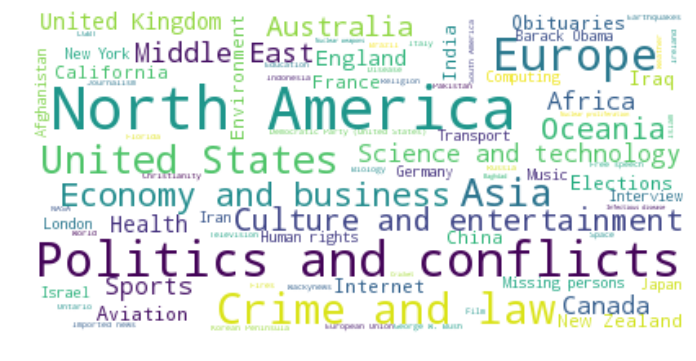

In [3]:
top_occurences = { name: occurences for name, occurences in occurences }
sum_occurences = sum(top_occurences.values())
top_occurences = {name: occurences / sum_occurences for name, occurences in top_occurences.items()}

cloud = WordCloud(background_color="white").fit_words(top_occurences)

fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax.imshow(cloud, interpolation="bilinear")
ax.axis("off");